# 測試GPU是否可用

In [1]:
import tensorflow as tf

# Check if any GPUs are available
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU is available. TensorFlow is running on GPU.")
    # Additional GPU-specific configuration can be done here
else:
    print("No GPU available. TensorFlow is running on CPU.")

GPU is available. TensorFlow is running on GPU.


In [2]:
# import torch
# print(torch.__version__)


In [3]:
import torch
print(torch.cuda.is_available())

c:\Users\User\anaconda3\envs\tf_2.6_py_3.7\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


False


# 預備資料

In [4]:
import pandas as pd

df = pd.read_csv('new_data.csv')
df1 = df['labels']
df2 = df['rw_review']
df_new = pd.concat([df1, df2], axis=1)
df_new.rename(columns = {'labels':'star', 'rw_review':'comment'}, inplace=True)
df_new.dropna(how='any', inplace=True)
df_new.reset_index(drop=True, inplace=True)
# df_new['star'] = df_new['star'].str.replace('顆星','')
df_new['comment'] = df_new['comment'].str.replace(r'\s*全文$', '', regex=True)

df_new.to_csv('brend_new_data.csv', encoding='UTF-8-sig')
print(df_new)

      star                                            comment
0        1             爛!態度又非常差，花一千五什麼都沒吃，還吹一小時的風，老闆就一句:我不管你…
1        1  禮拜一，位子在約中間的胡椒餅，我跟您買胡椒餅就覺得奇怪，為何每個攤販都很多人買，只有您沒人買...
2        1               工作人員非常不友善，不準人在入口處這個辦公室前說話，非常不適合孩子逗留!
3        1                       廣告也打得太凶了吧!離我住所十萬八千里,卻也能亂下旗標!
4        1  女服務員的態度很爛，你要是有訂桌的話不會擺訂桌嗎？人家都坐上去才趕別人走？有事？要馬你一開始...
...    ...                                                ...
4995     5  東勢林場是個很棒的地方，空氣清新怡人，園區的狗狗陪伴我們走了一段步道，是隻脾氣很溫和的可愛狗...
4996     5                    佔地面積廣大的生態公園，適合現在天氣涼爽的季節前往散步和運動。
4997     5       服務很好，採茶與泡茶體驗真的很棒！泡茶與姊姊聊天的氣氛也很喜歡有機會來台東一定會再回來…
4998     5              景觀平台，風景好，一個大石頭，遊樂設施，溜滑梯...，從這裡下山是八號步道
4999     5                     裡面很好拍照，門票可以抵消費，蠻適合帶小朋友來，巧克力好吃。

[5000 rows x 2 columns]


In [5]:
import pandas as pd

df_new = pd.read_csv('brend_new_data.csv')

In [6]:
list1 = []

star5,star4,star3,star2,star1 = 0, 0, 0, 0, 0

for index, star in enumerate(df_new.loc[:,"star"]):
    if int(star)==5:
        list1.append([1,0,0,0,0])
        star5+=1
    elif int(star)==4:
        list1.append([0,1,0,0,0])
        star4+=1
    elif int(star)==3:
        list1.append([0,0,1,0,0])
        star3+=1
    elif int(star)==2:
        list1.append([0,0,0,1,0])
        star2+=1
    else:
        list1.append([0,0,0,0,1])
        star1+=1
        
list2 = []

for index, comment in enumerate(df_new.loc[:,"comment"]):
    list2.append(comment)
    
list3 = []

for star, comment in zip(list1, list2):
    list3.append([star, comment])
    
train_rows = list3

In [7]:
print(train_rows)

[[[0, 0, 0, 0, 1], '爛!態度又非常差，花一千五什麼都沒吃，還吹一小時的風，老闆就一句:我不管你…'], [[0, 0, 0, 0, 1], '禮拜一，位子在約中間的胡椒餅，我跟您買胡椒餅就覺得奇怪，為何每個攤販都很多人買，只有您沒人買，還一堆在檯子上，買回飯店吃一打開，靠!全臭火乾的，黑色的胡椒餅...這做生意那麼沒有良心!難怪你們都沒人買，管理處是否會在意您的承租攤商這麼不老實呢!'], [[0, 0, 0, 0, 1], '工作人員非常不友善，不準人在入口處這個辦公室前說話，非常不適合孩子逗留!'], [[0, 0, 0, 0, 1], '廣告也打得太凶了吧!離我住所十萬八千里,卻也能亂下旗標!'], [[0, 0, 0, 0, 1], '女服務員的態度很爛，你要是有訂桌的話不會擺訂桌嗎？人家都坐上去才趕別人走？有事？要馬你一開始工讀生就告知有人訂位，要有服務生帶位，而不是叫客人隨便坐，觀感差到爆!是改了一個點連自己店家的聲譽都改了嗎？'], [[0, 0, 0, 0, 1], '到處是垃圾，園區內許多吸管套及衛生筷套，週邊的體育館附近等也是一堆夜市後留下的垃圾，感覺非常差。'], [[0, 0, 0, 0, 1], '點個小牛排套餐，牛肉一堆脂肪，不另外剔除就算了，整份牛肉一個酸味，非常無言…'], [[0, 0, 0, 0, 1], '最茂盛的地方放攤位，根本就是騙人家來的!其他地方都零散開。有的步道還很臭一堆水肥味道。'], [[0, 0, 0, 0, 1], '爛死了，電話也不接...接總機直接給我說謝謝再見是怎樣啊!有這麼沒水準的嗎？'], [[0, 0, 0, 0, 1], '超無聊!賣的冰也跟一般糖廠會看到的不同，且一支40元，還特別的貴。'], [[0, 0, 0, 0, 1], '點餐櫃台弄錯，換餐雞腿排外溫內冰，還有蚊子來襲，很不愉快的用餐經驗…'], [[0, 0, 0, 0, 1], '非常不推個人家庭來，打電話詢問了，店家沒說清楚，表明直接前往可參加400元Pizza的活動，來到卻說要預定，連吃單點的食物也要(前一天訂），沒得吃沒得玩，不重視客人'], [[0, 0, 0, 0, 1], '門口的接待人員推薦買點茶到泡茶區泡茶，茶買了但泡茶區的茶具不出借並且禁止飲食！如果是這樣為什麼不早說？感覺非常不好！'], [[

In [8]:
total = star5+star4+star3+star2+star1
print("五顆星評論數:{}；比重:{}\n四顆星評論數:{}；比重:{}\n三顆星評論數:{}；比重:{}\n二顆星評論數:{} ；比重:{}\n一顆星評論數:{} ；比重:{}".format(star5,star5/total,star4,star4/total,star3,star3/total,star2,star2/total,star1,star1/total))

五顆星評論數:1003；比重:0.2006
四顆星評論數:1005；比重:0.201
三顆星評論數:1006；比重:0.2012
二顆星評論數:1011 ；比重:0.2022
一顆星評論數:975 ；比重:0.195


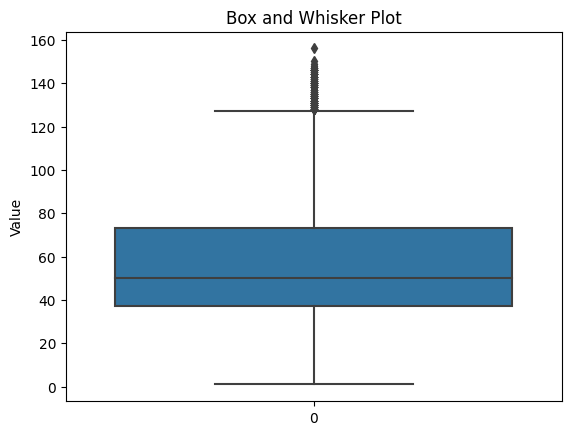

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

list4 = []
for i in range(len(train_rows)):
    list4.append(len(train_rows[i][1]))

sns.boxplot(data=list4)
plt.title("Box and Whisker Plot")
plt.ylabel("Value")
plt.show()

# 資料前處理

In [10]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader, RandomSampler, SequentialSampler
import torch
from transformers import BertTokenizer, BertModel, BertConfig, BertTokenizerFast
import numpy as np
import pandas as pd

numpy_data = pd.DataFrame(train_rows)
trainset, testset = train_test_split(numpy_data, test_size=0.2, random_state = 8)
validationset, testset = train_test_split(testset, test_size=0.5, random_state = 8)
trainset, validationset, testset = trainset.reset_index(), validationset.reset_index(), testset.reset_index()

In [11]:
print(trainset.head())
print(validationset.head())
print(testset.head())

   index                0                                                  1
0   4681  [1, 0, 0, 0, 0]  遠離城囂 ，令人神怡的彰化縣二林鎮的蕎麥花田，每年的11~12月就是花開盛時，有空來走走放鬆一下！
1    504  [0, 0, 0, 0, 1]  剛剛去公園大太陽下空無一人，車停在樹蔭下壓到一點雜草，那邊管理人就還叫我們移到停車場感覺很差...
2   4113  [1, 0, 0, 0, 0]  新景點可以一方面參觀天主堂，一方面品嚐可可的周邊產品。拍照打卡都很適合。商店的老闆娘、工作人...
3    162  [0, 0, 0, 0, 1]  爛公園 只讓幼稚園年紀的玩 一堆超重的大人上去 高中生不能玩 還會被拍 警衛完全不會請那些過...
4   2632  [0, 0, 1, 0, 0]                    回憶一下小時候的五分火車頭，衹是小時候看的火車頭好像沒有那麼大
   index                0                                                  1
0   2845  [0, 0, 1, 0, 0]                  觀光工廠兼促銷自家商品的地方，與瀏覽車結合的觀光台糖文創販售園區。
1   3551  [0, 1, 0, 0, 0]                 距離 坡度 適合戶外微踏青小爬山 行程，下季 有螢火蟲 油桐花可觀賞
2   3042  [0, 1, 0, 0, 0]                      比較適合一日輕旅行，園區有簡單的表演，可以下去河谷泡腳看魚
3     74  [0, 0, 0, 0, 1]  廁所內沒水，馬桶黃金滿出，似乎依據很久沒人整理，有夠噁心的。公園內樹葉垃圾未整理，可能因為環...
4   2463  [0, 0, 1, 0, 0]  給3顆星，是因為我今天2021·1·10週日來這裡要賞梅花，但是…登愣…，竟然梅花一朵都沒開...
   index                0                                                  1

In [12]:
print(len(trainset))
print(len(validationset))
print(len(testset))

4000
500
500


In [13]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer        #使用提供的tokenizer對文字進行分詞
        self.data = dataframe             #代入要分詞的資料
        self.title = dataframe[1]         #dataframe[1]為文字
        self.targets = dataframe[0]       #dataframe[0]為label
        self.max_len = max_len            #保留下的文字最大長度不超過max_len

    def __len__(self):
        return len(self.title)            #返回樣本的列總數

    def __getitem__(self, index):         
        title = str(self.title[index])
        title = " ".join(title.split())   #把索引的文字去除空白鍵

        inputs = self.tokenizer.encode_plus(
            title,                        
            None,                         #目前只有單句故設定為None 
            add_special_tokens=True,      #把一串序列的開頭和結果做標記    
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,   #返回token type ID
            truncation=True               #截斷超過長度的部分
        )
        ids = inputs['input_ids']         #分詞後的token ID序列
        mask = inputs['attention_mask']   #遮罩掉padding的部分，目的告訴模型哪些是真實值
        token_type_ids = inputs["token_type_ids"]  #用於區分不同句子的token type ID 序列


        return {
            'input_ids': torch.tensor(ids, dtype=torch.long),
            'attention_mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.targets[index], dtype=torch.float)
        }
    
    def samples(self):                    
      return [(title[:self.max_len], target) for target,title in zip(self.targets, self.title)]

#-----------------

max_seq_length = 135

#分詞器使用bert-base-chinese去分詞，超過max_length會截斷，不夠會padding
tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese',max_length=max_seq_length,padding='max_length', truncation=True)
training_set = CustomDataset(trainset, tokenizer, max_seq_length)                  #訓練資料集
validation_set = CustomDataset(validationset, tokenizer, max_seq_length)           #驗證資料集
test_set = CustomDataset(testset, tokenizer, max_seq_length)                       #測試資料集

In [14]:
print(trainset.iloc[2,2])
print(len(trainset.iloc[2,2]))
print(training_set.__getitem__(2)['input_ids'])

新景點可以一方面參觀天主堂，一方面品嚐可可的周邊產品。拍照打卡都很適合。商店的老闆娘、工作人員都很熱心介紹或提供試吃。
59
tensor([ 101, 3173, 3250, 7953, 1377,  809,  671, 3175, 7481, 1347, 6223, 1921,
         712, 1828, 8024,  671, 3175, 7481, 1501, 1705, 1377, 1377, 4638, 1453,
        6920, 4496, 1501,  511, 2864, 4212, 2802, 1305, 6963, 2523, 6900, 1394,
         511, 1555, 2421, 4638, 5439, 7293, 2023,  510, 2339,  868,  782, 1519,
        6963, 2523, 4229, 2552,  792, 5171, 2772, 2990,  897, 6275, 1391,  511,
         102,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0])


# 模型選擇

In [15]:
from transformers import DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer

# Define model
def model_init():
    model = AutoModelForSequenceClassification.from_pretrained(
      "ckiplab/bert-base-chinese",       #使用預訓練的中文 BERT 模型來進行初始化
      num_labels=5,                      #表示會輸出5個分類
      id2label={0: '5顆星', 1: '4顆星', 2: '3顆星', 3: '2顆星', 4: '1顆星'},
      output_attentions = False,         #不顯示權重資訊
      output_hidden_states = False,      #不顯示隱藏層資訊
      return_dict=True,                  #將模型返回結果以dict格式表示，Trainer要用字典格式
    )
    # model.to('cuda')                     # 將模型移至GPU                 
    return model

# 模型訓練

In [16]:
# device = torch.device("cpu")
# model.to(device)


In [17]:
import evaluate
import time
from datasets import load_metric
from sklearn.metrics import f1_score

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)     #於處理資料並進行填充

#定義compute_metrics func
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=-1, keepdims=True)
    predictions = np.argmax(probabilities, axis=-1)
    labels = np.array([np.argmax(label) for label in labels])
    f1_macro = f1_score(labels, predictions, average="macro")
    metric = evaluate.load('accuracy')
    accuracy = metric.compute(predictions=predictions, references=labels)
    return {
        "Valid_Accur": accuracy['accuracy'],
        "F1_macro": f1_macro,
    }

#設定模型參數
training_args = TrainingArguments(
    output_dir="./results",               #模型訓練結果輸出目錄
    learning_rate=2e-5,                   #學習率
    adam_epsilon=1e-8,                    #避免優化過程中分母出現0
    weight_decay=0.01,                    #控制模型正則化的超參數，防止模型overfitting，值越大越能防止overfitting
    per_device_train_batch_size=125,      #設定訓練裝置的批次大小
    per_device_eval_batch_size=125,       #設定評估裝置的批次大小
    num_train_epochs=8,                   #設定總訓練次數
    seed=8,                               #控制初始隨機過程的起始點
    data_seed=8,                          #控制資料集隨機的起始點
    evaluation_strategy="steps",          #每個訓練週期結束時進行評估
    eval_steps=32,                        #這邊設定成50步
    logging_steps=32,                     #每隔幾步輸出一次日誌資訊
    save_steps=32,                        #每隔幾步存一次模型參數
    disable_tqdm=False,                   #允許Trainer顯示進度條

)

trainer = Trainer(
    model_init=model_init,
    args=training_args,                   #使用我們設定的參數
    train_dataset=training_set,           #導入訓練資料集
    eval_dataset=validation_set,          #導入驗證資料集
    tokenizer=tokenizer,                  #導入分詞器
    data_collator=data_collator,          #導入padding
    compute_metrics=compute_metrics,      #設置計算指標的函數
)

history = trainer.train()

Some weights of the model checkpoint at ckiplab/bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ckiplab/bert-base-c

{'loss': 0.4735, 'learning_rate': 1.7500000000000002e-05, 'epoch': 1.0}


                                                  
 12%|█▎        | 32/256 [36:15<3:47:30, 60.94s/it]

{'eval_loss': 0.3447254002094269, 'eval_Valid_Accur': 0.646, 'eval_F1_macro': 0.6247533514268402, 'eval_runtime': 31.4096, 'eval_samples_per_second': 15.919, 'eval_steps_per_second': 0.127, 'epoch': 1.0}


 25%|██▌       | 64/256 [1:09:56<3:19:53, 62.47s/it]

{'loss': 0.2989, 'learning_rate': 1.5000000000000002e-05, 'epoch': 2.0}


                                                    
 25%|██▌       | 64/256 [1:10:27<3:19:53, 62.47s/it]

{'eval_loss': 0.24274218082427979, 'eval_Valid_Accur': 0.758, 'eval_F1_macro': 0.7494107181530161, 'eval_runtime': 31.0329, 'eval_samples_per_second': 16.112, 'eval_steps_per_second': 0.129, 'epoch': 2.0}


 38%|███▊      | 96/256 [1:40:43<2:30:12, 56.33s/it]

{'loss': 0.225, 'learning_rate': 1.25e-05, 'epoch': 3.0}


                                                    
 38%|███▊      | 96/256 [1:41:15<2:30:12, 56.33s/it]

{'eval_loss': 0.21888232231140137, 'eval_Valid_Accur': 0.76, 'eval_F1_macro': 0.7542601354518513, 'eval_runtime': 32.0515, 'eval_samples_per_second': 15.6, 'eval_steps_per_second': 0.125, 'epoch': 3.0}


 50%|█████     | 128/256 [2:11:07<1:59:34, 56.05s/it]

{'loss': 0.1859, 'learning_rate': 1e-05, 'epoch': 4.0}


                                                     
 50%|█████     | 128/256 [2:11:39<1:59:34, 56.05s/it]

{'eval_loss': 0.2144482284784317, 'eval_Valid_Accur': 0.772, 'eval_F1_macro': 0.7595095478368867, 'eval_runtime': 31.3509, 'eval_samples_per_second': 15.949, 'eval_steps_per_second': 0.128, 'epoch': 4.0}


 62%|██████▎   | 160/256 [2:41:39<1:32:14, 57.65s/it]

{'loss': 0.1584, 'learning_rate': 7.500000000000001e-06, 'epoch': 5.0}


                                                     
 62%|██████▎   | 160/256 [2:42:10<1:32:14, 57.65s/it]

{'eval_loss': 0.22253987193107605, 'eval_Valid_Accur': 0.772, 'eval_F1_macro': 0.7660619256983511, 'eval_runtime': 31.086, 'eval_samples_per_second': 16.084, 'eval_steps_per_second': 0.129, 'epoch': 5.0}


 75%|███████▌  | 192/256 [3:12:06<59:16, 55.56s/it]  

{'loss': 0.1334, 'learning_rate': 5e-06, 'epoch': 6.0}


                                                   
 75%|███████▌  | 192/256 [3:12:37<59:16, 55.56s/it]

{'eval_loss': 0.21308398246765137, 'eval_Valid_Accur': 0.768, 'eval_F1_macro': 0.7632425829003193, 'eval_runtime': 31.2956, 'eval_samples_per_second': 15.977, 'eval_steps_per_second': 0.128, 'epoch': 6.0}


 88%|████████▊ | 224/256 [3:43:59<30:45, 57.68s/it]  

{'loss': 0.1196, 'learning_rate': 2.5e-06, 'epoch': 7.0}


                                                   
 88%|████████▊ | 224/256 [3:44:30<30:45, 57.68s/it]

{'eval_loss': 0.2178579419851303, 'eval_Valid_Accur': 0.772, 'eval_F1_macro': 0.7664471351267699, 'eval_runtime': 31.3451, 'eval_samples_per_second': 15.951, 'eval_steps_per_second': 0.128, 'epoch': 7.0}


100%|██████████| 256/256 [4:17:32<00:00, 61.15s/it]

{'loss': 0.1098, 'learning_rate': 0.0, 'epoch': 8.0}



100%|██████████| 256/256 [4:18:03<00:00, 61.15s/it]

{'eval_loss': 0.2197662889957428, 'eval_Valid_Accur': 0.766, 'eval_F1_macro': 0.7613067459165429, 'eval_runtime': 31.176, 'eval_samples_per_second': 16.038, 'eval_steps_per_second': 0.128, 'epoch': 8.0}


100%|██████████| 256/256 [4:18:04<00:00, 60.48s/it]

{'train_runtime': 15484.0655, 'train_samples_per_second': 2.067, 'train_steps_per_second': 0.017, 'train_loss': 0.21305366605520248, 'epoch': 8.0}


# Test_Set_Accuracy

In [18]:
from transformers import TextClassificationPipeline
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import time
from transformers import BertTokenizer, BertModel, BertConfig, BertTokenizerFast
import pandas as pd
import re

new_model = AutoModelForSequenceClassification.from_pretrained("./results/checkpoint-224/", output_attentions=True)
# new_model.to('cuda')  # 將模型移至GPU

max_seq_length = 135
tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese',max_length=max_seq_length,padding='max_length', truncation=True)

# PipelineInterface = TextClassificationPipeline(model=new_model, tokenizer=tokenizer,device=0, return_all_scores=False)
PipelineInterface = TextClassificationPipeline(model=new_model, tokenizer=tokenizer,device=-1, return_all_scores=False)


predicted = []
label = testset[0].tolist()
new_predicted = []
new_label = []

for text in testset[1]:
    if len(text) > 512:
        inputs = tokenizer(text, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
        inputs.to('cuda')  # 將輸入資料移到GPU
        text = tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)
    result = PipelineInterface(text)
    predicted.append(result[0]["label"])
    
for item in predicted:
    if item == "1顆星":
        new_predicted.append(1)
    elif item == "2顆星":
        new_predicted.append(2)
    elif item == "3顆星":
        new_predicted.append(3)
    elif item == "4顆星":
        new_predicted.append(4)
    else:
        new_predicted.append(5)
        
for item in label:
    if item == [0,0,0,0,1]:
        new_label.append(1)
    elif item == [0,0,0,1,0]:
        new_label.append(2)
    elif item == [0,0,1,0,0]:
        new_label.append(3)
    elif item == [0,1,0,0,0]:
        new_label.append(4)
    else:
        new_label.append(5)
     
correct_predictions = [1 if p == a else 0 for p, a in zip(new_predicted, new_label)]
accuracy = sum(correct_predictions) / len(new_predicted)

print("Test_Accur:{:02f}".format(accuracy))


c:\Users\User\anaconda3\envs\tf_2.6_py_3.7\lib\site-packages\transformers\pipelines\text_classification.py:107: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  UserWarning,
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


Test_Accur:0.786000


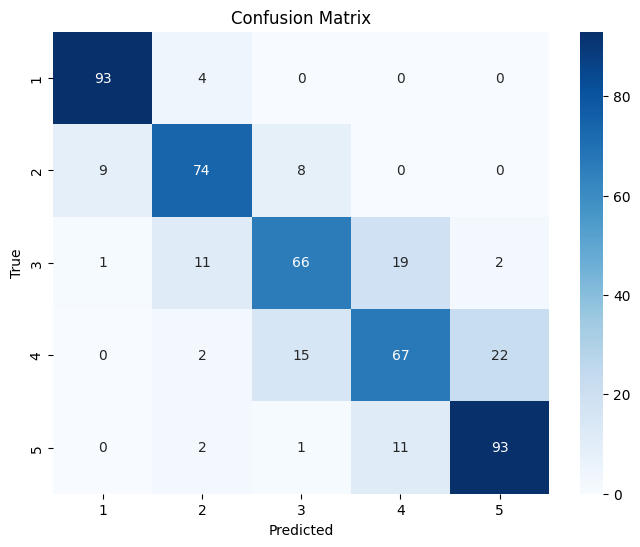

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(new_label, new_predicted, labels=[1, 2, 3, 4, 5])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
def staraccur(lis, n):
    n1 = 0
    n2 = 0
    for item1, item2 in zip(new_predicted, new_label):
        if item1 == lis and item2 == lis:
            n1 += 1
        elif item1 != lis and item2 == lis:
            n2 += 1
    print("{:d}Star_Accur:{:02f}".format(n, n1/(n1 + n2)))

staraccur(1, 1)
staraccur(2, 2)
staraccur(3, 3)
staraccur(4, 4)
staraccur(5, 5)

1Star_Accur:0.958763
2Star_Accur:0.813187
3Star_Accur:0.666667
4Star_Accur:0.632075
5Star_Accur:0.869159


# 模型訓練時間

In [21]:
runtime_seconds = history.metrics["train_runtime"]
print("Total_Training_Time:{:02d}:{:02d}:{:02d}".format(int(runtime_seconds//3600),int((runtime_seconds % 3600) // 60),int(runtime_seconds % 60)))

Total_Training_Time:04:18:04


# 收集trainer相關資訊

In [22]:
training_progress_scores = trainer.state.log_history
eval_f1_list = []
eval_loss_list = []
eval_accuracy_list = []
eval_runtime_list = []
eval_samples_per_second_list = []
eval_steps_per_second_list = []
epoch_list = []
step_list = []
loss_list = []
learning_rate_list = []

for i in training_progress_scores:
    try:
        eval_f1_list.append(i['eval_F1_macro'])
    except:
        eval_f1_list.append(np.nan)
    try:
        eval_loss_list.append(i["eval_loss"])
    except:
        eval_loss_list.append(np.nan)
    try:
        eval_accuracy_list.append(i["eval_Valid_Accur"])
    except:
        eval_accuracy_list.append(np.nan)
    try:
        eval_runtime_list.append(i["eval_runtime"])
    except:
        eval_runtime_list.append(np.nan)
    try:
        eval_samples_per_second_list.append(i["eval_samples_per_second"])
    except:
        eval_samples_per_second_list.append(np.nan)
    try:
        eval_steps_per_second_list.append(i["eval_steps_per_second"])
    except:
        eval_steps_per_second_list.append(np.nan)
    try:        
        epoch_list.append(i["epoch"])
    except:
        epoch_list.append(np.nan)
    try:
        step_list.append(i["step"])
    except:
        step_list.append(np.nan)
    try:
        loss_list.append(i["loss"])
    except:
        loss_list.append(np.nan)
    try:
        learning_rate_list.append(i["learning_rate"])
    except:
        learning_rate_list.append(np.nan)
df_stats = pd.DataFrame({
                        "F1_macro":eval_f1_list,
                        "eval_loss":eval_loss_list,
                        "Valid_Accur":eval_accuracy_list,
                        "eval_runtime":eval_runtime_list,
                        "eval_samples_per_second":eval_samples_per_second_list,
                        "eval_steps_per_second":eval_steps_per_second_list,
                        "epoch":epoch_list,
                        "step":step_list,
                        "loss":loss_list,
                        "learning_rate":learning_rate_list})
# print(df_stats)
df_stats_eval_loss = df_stats[df_stats["eval_loss"] >= 0]["eval_loss"]
df_stats_eval_loss = df_stats_eval_loss.reset_index(drop=True)
df_stats_eval_loss.index = range(1, len(df_stats_eval_loss) + 1)

df_stats_loss = df_stats[df_stats["loss"] >= 0]["loss"]
df_stats_loss = df_stats_loss.reset_index(drop=True)
df_stats_loss.index = range(1, len(df_stats_loss) + 1)

df_stats_eval_accuracy = df_stats[df_stats["Valid_Accur"] >= 0]["Valid_Accur"]
df_stats_eval_accuracy = df_stats_eval_accuracy.reset_index(drop=True)
df_stats_eval_accuracy.index = range(1, len(df_stats_eval_accuracy) + 1)

df_stats_eval_f1 = df_stats[df_stats["F1_macro"] >= 0]["F1_macro"]
df_stats_eval_f1 = df_stats_eval_f1.reset_index(drop=True)
df_stats_eval_f1.index = range(1, len(df_stats_eval_f1) + 1)

# 圖像顯示Loss、ACC、F1

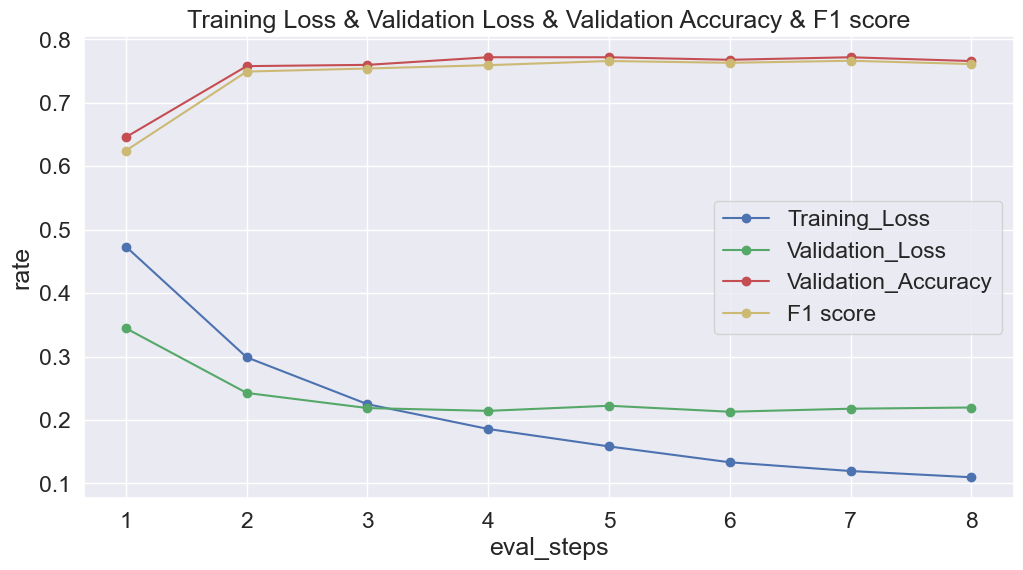

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 繪圖風格設置
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# 繪製曲線
plt.plot(df_stats_loss, 'b-o', label="Training_Loss")
plt.plot(df_stats_eval_loss, 'g-o', label="Validation_Loss")
plt.plot(df_stats_eval_accuracy, 'r-o', label="Validation_Accuracy")
plt.plot(df_stats_eval_f1, 'y-o', label="F1 score")

# Label the plot.
plt.title("Training Loss & Validation Loss & Validation Accuracy & F1 score")
plt.xlabel("eval_steps")
plt.ylabel("rate")
plt.legend()
plt.xticks([i for i in range(1, len(df_stats_eval_loss)+1)])

plt.show() 

# 模型測試

In [24]:
#測試用
from transformers import TextClassificationPipeline
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
new_model = AutoModelForSequenceClassification.from_pretrained("./results/checkpoint-224/",output_attentions=True)

PipelineInterface = TextClassificationPipeline(model=new_model, tokenizer=tokenizer, return_all_scores=True)
result = PipelineInterface("還可以")
print(result)

[[{'label': '5顆星', 'score': 0.0635441467165947}, {'label': '4顆星', 'score': 0.12204202264547348}, {'label': '3顆星', 'score': 0.5343066453933716}, {'label': '2顆星', 'score': 0.08177316188812256}, {'label': '1顆星', 'score': 0.05507584288716316}]]


c:\Users\User\anaconda3\envs\tf_2.6_py_3.7\lib\site-packages\transformers\pipelines\text_classification.py:107: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  UserWarning,


# 輸出結果

In [25]:
import pandas as pd

df = pd.read_csv("review_overview.csv")

#拆分原始dataframe
part1 = df.iloc[:300001]
part2 = df.iloc[300001:500001]
part3 = df.iloc[500001:700001]
part4 = df.iloc[700001:1000001]
part5 = df.iloc[1000001:1300001]
part6 = df.iloc[1300001:1600001]
part7 = df.iloc[1600001:1733312]

part1.to_csv("part1.csv", index=None, encoding="UTF-8-sig")
part2.to_csv("part2.csv", index=None, encoding="UTF-8-sig")
part3.to_csv("part3.csv", index=None, encoding="UTF-8-sig")
part4.to_csv("part4.csv", index=None, encoding="UTF-8-sig")
part5.to_csv("part5.csv", index=None, encoding="UTF-8-sig")
part6.to_csv("part6.csv", index=None, encoding="UTF-8-sig")
part7.to_csv("part7.csv", index=None, encoding="UTF-8-sig")

print("---Done---")

FileNotFoundError: [Errno 2] No such file or directory: 'review_overview.csv'

In [ ]:
import pandas as pd

# part1 = pd.read_csv('part1.csv')
# part2 = pd.read_csv('part2.csv')
# part3 = pd.read_csv('part3.csv')
# part4 = pd.read_csv('part4.csv')
part5 = pd.read_csv('part5.csv')
# part6 = pd.read_csv('part6.csv')
# part7 = pd.read_csv('part7.csv')

In [ ]:
from transformers import TextClassificationPipeline
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import time
from transformers import BertTokenizer, BertModel, BertConfig, BertTokenizerFast
import pandas as pd
import numpy as np

# 建立模型
new_model = AutoModelForSequenceClassification.from_pretrained("./results/checkpoint-224/", output_attentions=True)
new_model.to('cuda')  # 將模型移至GPU

#建構一個分詞器使用bert-base-chinese詞庫去分詞，超過max_length會截斷，不夠會padding
max_seq_length = 512
tokenizer = BertTokenizerFast.from_pretrained('bert-base-chinese',max_length=max_seq_length,padding='max_length', truncation=True)

# 載入評論資料
df_pre_star = part5

# 初始化 PipelineInterface
PipelineInterface = TextClassificationPipeline(model=new_model, tokenizer=tokenizer,device=0, return_all_scores=False)

#計時開始
start_time = time.time()

# 進行預測        
for i in range(len(df_pre_star["rw_review"])):
    text = df_pre_star.loc[i, "rw_review"]
    if text is np.nan:
        df_pre_star.loc[i, "new_star_label"] = np.nan
    else:
        if len(text) > 512:
            inputs = tokenizer(text, max_length=512, padding='max_length', truncation=True, return_tensors='pt')
            inputs.to('cuda')  # 將輸入資料移到GPU
            text = tokenizer.decode(inputs["input_ids"][0], skip_special_tokens=True)
        result = PipelineInterface(text)
        df_pre_star.loc[i, "new_star_label"] = result[0]["label"]

df_pre_star.to_csv("part5_new.csv", index=None, encoding="UTF-8-sig")
print("---Done---")

#計時結束
end_time = time.time()

total_time = end_time - start_time

print("Total_Time:{:02d}:{:02d}:{:02d}".format(int(total_time//3600),int((total_time % 3600) // 60),int(total_time % 60)))

In [ ]:
import pandas as pd

# part1 = pd.read_csv('part1_new.csv')
# part2 = pd.read_csv('part2_new.csv')
# part3 = pd.read_csv('part3_new.csv')
# part4 = pd.read_csv('part4_new.csv')
# part5 = pd.read_csv('part5_new.csv')
# part6 = pd.read_csv('part6_new.csv')
# part7 = pd.read_csv('part7_new.csv')

In [ ]:
#合併原始dataframe
combined_df = pd.concat([part1, part2, part3, part4, part5, part6, part7], ignore_index=True)

combined_df.to_csv("review_overview_newstar.csv", index=None, encoding="UTF-8-sig")
print("---Done---")